미국 인구조사 데이터 1995
대략 5만명을 조사.
나이, 직업, 결혼 상황, 교육정도, 인종, 건너온 나라, 소득수준
1년 소득이 5만달러(6천만원) 이상인지 아닌지를 분류하는 문제

다음의 순서로 분석해보았습니다.
1. 데이터 획득
1. 데이터 정제
1. 데이터 분석
1. 모델 선택
1. 결과 시각화

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [123]:
df = pd.read_csv('C:/Users/user/Downloads/adult.data', header=None,encoding='cp949')
df.shape

(32561, 15)

In [124]:
df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [125]:
col = ['age','workclass','fnlwgt','education','education-num','marital-status',
 'occupation','relationship','race','sex','capital-gain','capital-loss',
'hours-per-week','native-country', 'income']
len(col)

15

In [126]:
df.columns = col

In [127]:
df = df.drop(columns='fnlwgt') #필요없는 데이터 제거

전처리 : 카테고리 > 수치
         자연어 > 수치

In [128]:
df.sex.unique(), df.income.unique(), 

(array([' Male', ' Female'], dtype=object),
 array([' <=50K', ' >50K'], dtype=object))

In [129]:
df.sex = df.sex.map({' Male':0, ' Female':1}) #카테고리가 2개일 때만 사용 가능
df.income = df.income.map({' <=50K':0, ' >50K':1})
df.sex = df.sex.astype(int)
df.income = df.income.astype(int)

In [130]:
df.dtypes #카테고리 확인 

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex                int32
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int32
dtype: object

https://github.com/sogangori/python_test

In [132]:
df = pd.get_dummies(df) # 카테고리를 원핫 인코딩
df.shape

(32561, 107)

In [138]:
y = df.income
x = df.drop(columns='income')

In [154]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10).fit(x,y)
model.score(x,y)

0.843770154479285

In [155]:
x.columns[model.feature_importances_> 0.01] # 중요한 특징 

Index(['education-num', 'capital-gain', 'capital-loss', 'hours-per-week',
       'marital-status_ Married-civ-spouse'],
      dtype='object')

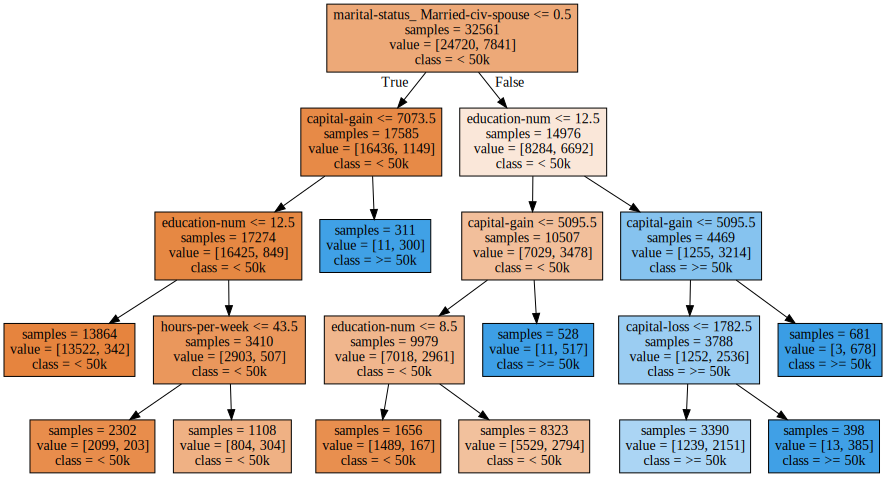

In [156]:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='tree.dot', class_names=['< 50k','>= 50k'],
        feature_names=x.columns, impurity=False, filled=True)
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import graphviz #패키지 설치 anaconda prompt / pip install graphviz 
with open('tree.dot') as f:
    dot_graph = f.read()    
g = graphviz.Source(dot_graph)
display(g)

In [106]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [11]:
#df.mean()
df.describe() #통계정보 보기

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [27]:
len(df.fnlwgt),df.fnlwgt.nunique(), df.fnlwgt.min(), df.fnlwgt.max()

(32561, 21648, 12285, 1484705)

age: continuous. 
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
fnlwgt: continuous. 
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
education-num: continuous. 
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
sex: Female, Male. 
capital-gain: continuous. 
capital-loss: continuous. 
hours-per-week: continuous. 
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [14]:
df.isna().sum().sum()

0

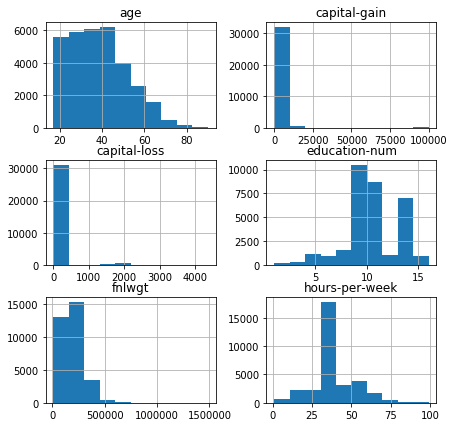

In [23]:
#그림이 안나올때
%matplotlib inline
a = df.hist(figsize=(7,7))

In [29]:
df.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [31]:
df.workclass.value_counts() #값이 몇번 나오는지를 셉니다

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

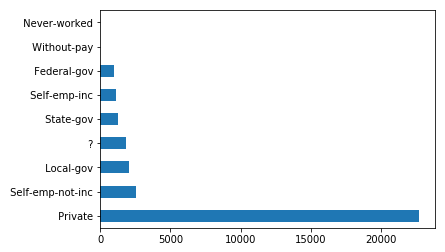

In [34]:
df.workclass.value_counts().plot.barh()

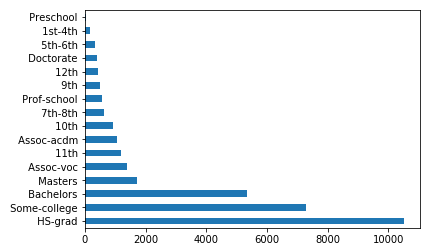

In [35]:
df.education.value_counts().plot.barh()

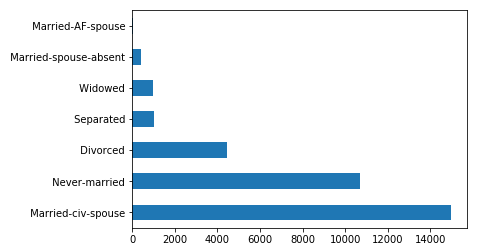

In [37]:
df['marital-status'].value_counts().plot.barh()

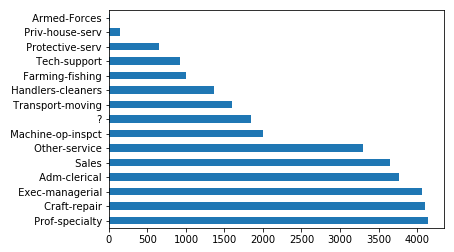

In [38]:
df['occupation'].value_counts().plot.barh()

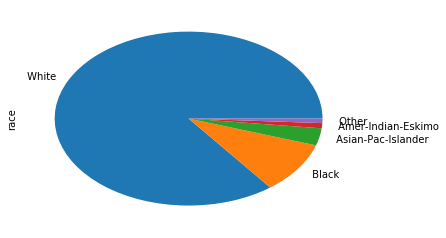

In [42]:
df['race'].value_counts().plot.pie() #카테고리가 많지 않을때 효과적

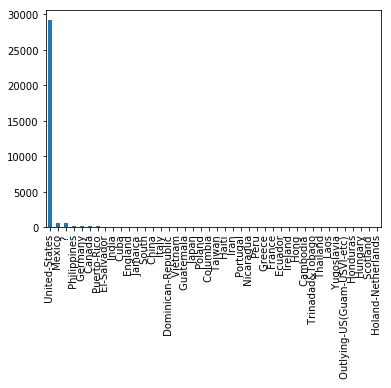

In [46]:
df['native-country'].value_counts().plot.bar()

In [48]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

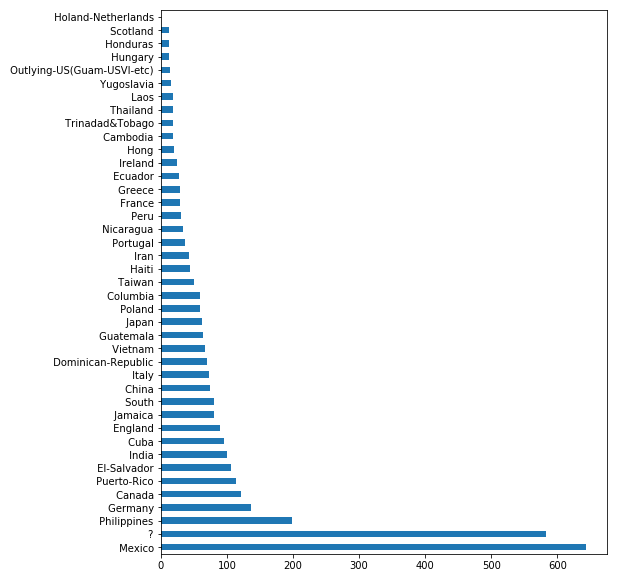

In [52]:
#미국인 빼고 조건부 검색
cond = df['native-country'] !=' United-States' 
df[cond]['native-country'].value_counts().plot.barh(figsize=(8,10))

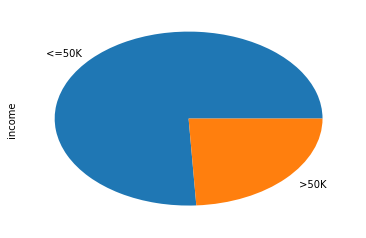

In [54]:
df['income'].value_counts().plot.pie()

In [39]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

그룹별 데이터 분석

컬럼이 카테고리여야 합니다. 
수치형 컬럼은 그룹별로 분석할 수 없어요

.groupby('컬럼').mean()
.groupby('컬럼').agg(['mean', 'max'])
.groupby(['컬럼', '컬럼']).mean()

In [76]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

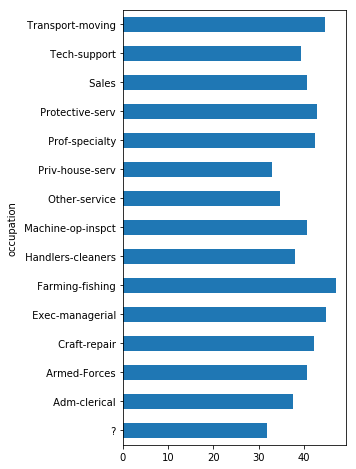

In [81]:
# 직업별로 일주일에 일하는 시간을 그려봅시다
# 직업별로 그룹화 한 다음 '일하는 시간' 을 그래프로 나타냅니다
g = df.groupby('occupation').mean() 
g['hours-per-week'].plot.barh(figsize=(4,8)) 

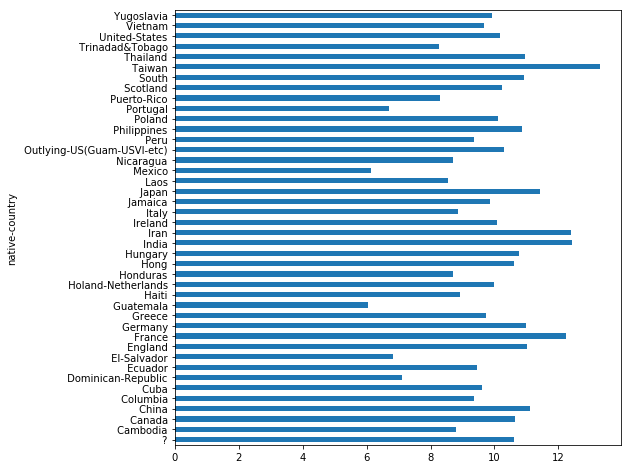

In [75]:
# 국가별 교육 정도
g = df.groupby('native-country').mean()
g['education-num'].plot.barh(figsize=(8,8)) # 컬럼 하나만 그래프로 그립니다

In [64]:
df.groupby('native-country').mean().sort_values('education-num', ascending=False)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
native-country,,,,,,
Taiwan,33.823529,186441.392157,13.294118,2147.039216,154.823529,38.882353
India,38.090000,168539.090000,12.430000,3604.920000,131.120000,41.530000
Iran,39.418605,182211.395349,12.395349,2044.651163,126.813953,43.976744
France,38.965517,192050.896552,12.241379,547.034483,0.000000,45.068966
Japan,38.241935,185703.629032,11.435484,2546.225806,57.532258,43.693548
China,42.533333,179047.986667,11.120000,366.480000,179.520000,37.786667
England,41.155556,182375.166667,11.011111,864.722222,82.755556,41.833333
Germany,39.255474,189325.313869,10.985401,887.094891,77.978102,41.014599
Thailand,34.944444,184166.666667,10.944444,0.000000,0.000000,45.444444
